## **UNITED_AIRLINES_HACKATHON**
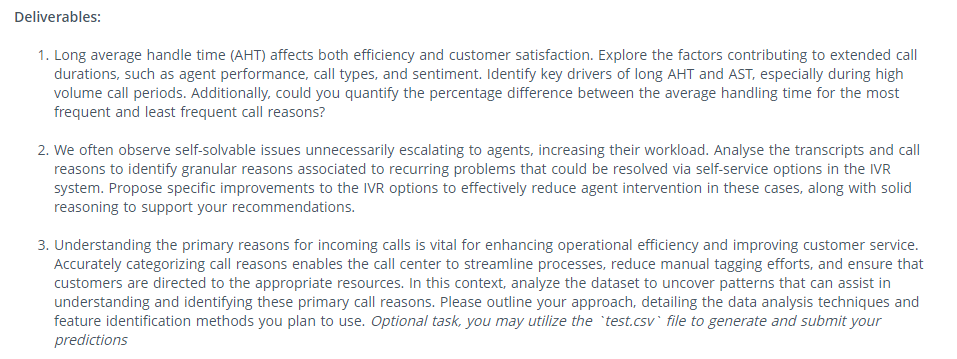

## **MOUNT AND IMPORT**

In [37]:
#from google.colab import drive   //in case if you use google collab
#drive.mount('/content/drive')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **DATA PREPROCESSING**

### **LOAD FILES**

In [39]:
calls_df = pd.read_csv('/content/callsf0d4f5a.csv')
reason_df = pd.read_csv('/content/reason18315ff.csv')
customer_df = pd.read_csv('/content/customers2afd6ea.csv')
sentiment_df = pd.read_csv('/content/sentiment_statisticscc1e57a.csv')

In [40]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [41]:
calls_df.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
5,5297766997,5590154991,817160,8/1/2024 0:11,8/1/2024 0:16,8/1/2024 0:40,\n\nAgent: Thank you for calling United Airlin...
6,324593040,6774865122,519057,8/1/2024 0:08,8/1/2024 0:21,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
7,8902603117,7974326984,488324,8/1/2024 0:13,8/1/2024 0:21,8/1/2024 0:29,\n\nAgent: Thank you for calling United Airlin...
8,7222687732,8023417234,957331,8/1/2024 0:14,8/1/2024 0:22,8/1/2024 0:35,\n\nAgent: Thank you for calling United Airlin...
9,4113684017,1528835057,158319,8/1/2024 0:20,8/1/2024 0:28,8/1/2024 0:37,\n\nAgent: Thank you for calling United Airlin...


In [42]:
reason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [43]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [44]:
total_customers = customer_df['customer_id'].nunique()
non_rated_customers = customer_df['customer_id'].count() - customer_df['elite_level_code'].count()

print(f"Total number of customers: {total_customers}")
print(f"Total number of Rated customers: {total_customers - non_rated_customers}")
print(f"Total number of Non-rated customers: {non_rated_customers}")

non_rated_perc = (non_rated_customers / total_customers) * 100
non_rated_perc = round(non_rated_perc, 2)
print(f"Rated customers: {100-non_rated_perc}%")
print(f"Non-rated customers: {non_rated_perc}%")

Total number of customers: 71810
Total number of Rated customers: 46043
Total number of Non-rated customers: 25767
Rated customers: 64.12%
Non-rated customers: 35.88%


In [45]:
sentiment_df.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [46]:
dirty_unique_values = reason_df['primary_call_reason'].unique()
print(f"All the 'primary_call_reason' are: {dirty_unique_values}")

All the 'primary_call_reason' are: ['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' 'Voluntary   Change' 'Post Flight' 'Check In'
 'Other  Topics' 'Communications' 'Schedule Change' 'Products & Services'
 'IRROPS  ' 'Digital   Support' 'Seating  ' 'Disability'
 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates' 'Communications  '
 'ETC' 'Upgrade  ' 'Unaccompanied Minor  ' 'Voluntary Change'
 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus' 'Mileage Plus  '
 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  ' 'Schedule Change  '
 'Baggage' 'Traveler Updates' 'Voluntary Cancel' 'Check-In'
 'Products and Services' 'Check-In  ' 'Other Topics' 'Other Topics  '
 'ETC  ' 'Disability  ' 'Digital Support' 'Digital Support  '
 'Voluntary Cancel  ' 'Products and Services  ' 'Traveler Updates  '
 'Traveler   Updates' 'Digital  Support' 'Mileage  Plus'
 'Voluntary  Change']


In [47]:
reasons = reason_df['primary_call_reason'].nunique()
print(f"Number of 'primary_call_reason': {reasons}")

Number of 'primary_call_reason': 54


In [48]:
# standardizing vals
def standardize_primary_call_reason(reason):
    reason = ' '.join(reason.split())

    replacements = {
        'Voluntary Cancel': 'Voluntary Cancel',
        'Booking': 'Booking',
        'IRROPS': 'IRROPS',
        'Upgrade': 'Upgrade',
        'Seating': 'Seating',
        'Mileage Plus': 'Mileage Plus',
        'Checkout': 'Checkout',
        'Voluntary Change': 'Voluntary Change',
        'Post Flight': 'Post Flight',
        'Check In': 'Check-In',
        'Other Topics': 'Other Topics',
        'Communications': 'Communications',
        'Schedule Change': 'Schedule Change',
        'Products & Services': 'Products and Services',
        'Digital Support': 'Digital Support',
        'Disability': 'Disability',
        'Unaccompanied Minor': 'Unaccompanied Minor',
        'Baggage': 'Baggage',
        'Traveler Updates': 'Traveler Updates',
        'ETC': 'ETC'
    }

    return replacements.get(reason, reason)

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].apply(standardize_primary_call_reason)

In [49]:
cleaned_unique_values = reason_df['primary_call_reason'].unique()
print(f"The unique 'primary_call_reason' are: {cleaned_unique_values}")

The unique 'primary_call_reason' are: ['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post Flight' 'Check-In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC' 'Post-Flight']


In [50]:
reason_df['primary_call_reason'].nunique()

21

In [51]:
pmc = reasons
pmc_unique = reason_df['primary_call_reason'].nunique()

print(f"Number of unique values in 'primary_call_reason': {pmc_unique}")
print(f"Number of redundant values removed: {pmc-pmc_unique}")

Number of unique values in 'primary_call_reason': 21
Number of redundant values removed: 33


In [52]:
customer_df['elite_level_code'].value_counts()

,count
elite_level_code,
0.0,14387
1.0,14370
2.0,8028
3.0,5736
4.0,2125
5.0,1397


In [53]:
calls_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


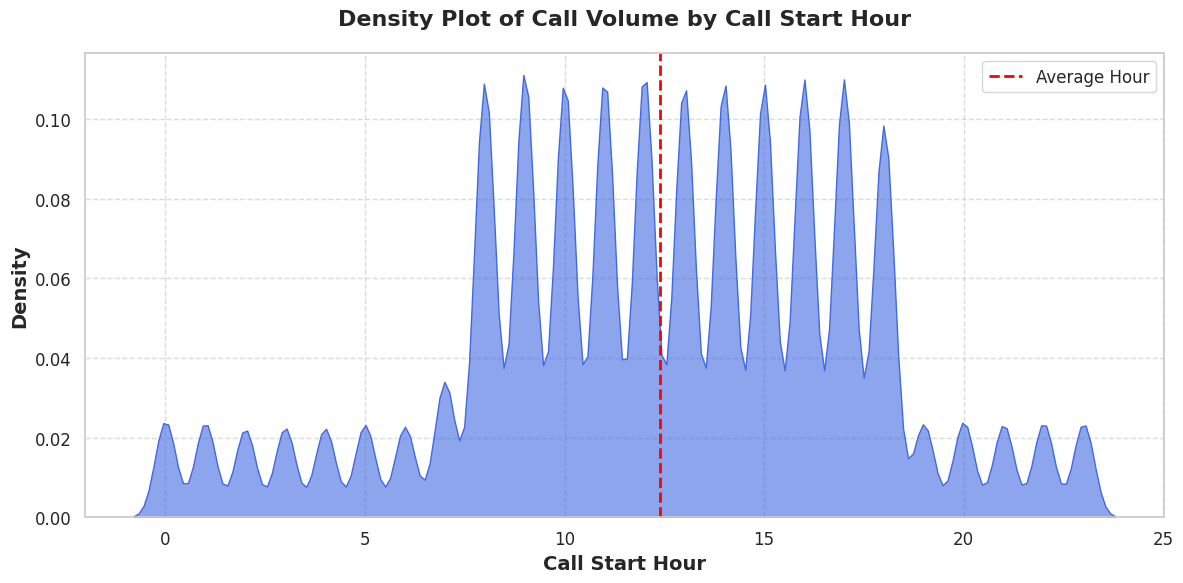

In [54]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_hour'] = calls_df['call_start_datetime'].dt.hour
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
kde = sns.kdeplot(data=calls_df, x='call_hour', fill=True, color='royalblue', bw_adjust=0.5, alpha=0.6)

plt.xlabel('Call Start Hour', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Density Plot of Call Volume by Call Start Hour', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.7)

average_hour = calls_df['call_hour'].mean()
plt.axvline(average_hour, color='red', linestyle='--', label='Average Hour', linewidth=2)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [55]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df['waiting_time'] = calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']
calls_df['handling_time'] = calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']

calls_df.loc[:, 'call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df.loc[:, 'agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df.loc[:, 'call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df.loc[:, 'waiting_time'] = calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']
calls_df.loc[:, 'handling_time'] = calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']

calls_df.loc[:, 'waiting_time'] = calls_df['waiting_time'].dt.total_seconds() / 60
calls_df.loc[:, 'handling_time'] = calls_df['handling_time'].dt.total_seconds() / 60
calls_df = calls_df.drop(columns=['call_start_datetime','agent_assigned_datetime', 'call_end_datetime'])
calls_df

,call_id,customer_id,agent_id,call_transcript,call_hour,waiting_time,handling_time
0,4667960400,2033123310,963118,\n\nAgent: Thank you for calling United Airlin...,23,7.0,31.0
1,1122072124,8186702651,519057,\n\nAgent: Thank you for calling United Airlin...,0,3.0,12.0
2,6834291559,2416856629,158319,\n\nAgent: Thank you for calling United Airlin...,23,8.0,19.0
3,2266439882,1154544516,488324,\n\nAgent: Thank you for calling United Airlin...,0,5.0,7.0
4,1211603231,5214456437,721730,\n\nAgent: Thank you for calling United Airlin...,0,10.0,9.0
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,\n\nAgent: Thank you for calling United Airlin...,23,9.0,28.0
71806,8865997781,4474867021,980156,\n\nAgent: Thank you for calling United Airlin...,23,3.0,8.0
71807,8019240181,9762042472,616988,\n\nAgent: Thank you for calling United Airlin...,23,6.0,6.0
71808,8332067080,8095620266,161354,\n\nAgent: Thank you for calling United Airlin...,23,6.0,4.0


### **JOIN**

In [56]:
dfs_to_join = [reason_df, sentiment_df]
result_df = calls_df

for df in dfs_to_join:
    result_df = pd.merge(result_df, df, on='call_id', how='inner')

result_df = pd.merge(result_df, customer_df, on='customer_id', how='inner')

In [57]:
result_df = result_df.drop(columns = ['agent_id_y', 'customer_name'])
result_df = result_df.rename(columns={'agent_id_x': 'agent_id'})

In [58]:
result_df

,call_id,customer_id,agent_id,call_transcript,call_hour,waiting_time,handling_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code
0,4667960400,2033123310,963118,\n\nAgent: Thank you for calling United Airlin...,23,7.0,31.0,Voluntary Cancel,neutral,angry,-0.04,0.39,4.0
1,1122072124,8186702651,519057,\n\nAgent: Thank you for calling United Airlin...,0,3.0,12.0,Booking,calm,neutral,0.02,0.35,NaN
2,6834291559,2416856629,158319,\n\nAgent: Thank you for calling United Airlin...,23,8.0,19.0,IRROPS,neutral,polite,-0.13,0.32,NaN
3,2266439882,1154544516,488324,\n\nAgent: Thank you for calling United Airlin...,0,5.0,7.0,Upgrade,neutral,frustrated,-0.20,0.20,2.0
4,1211603231,5214456437,721730,\n\nAgent: Thank you for calling United Airlin...,0,10.0,9.0,Seating,neutral,polite,-0.05,0.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,\n\nAgent: Thank you for calling United Airlin...,23,6.0,10.0,Mileage Plus,neutral,frustrated,-0.19,0.51,2.0
66649,1563273072,8022667294,413148,\n\nAgent: Thank you for calling United Airlin...,23,9.0,28.0,Post Flight,calm,calm,0.05,0.34,NaN
66650,8865997781,4474867021,980156,\n\nAgent: Thank you for calling United Airlin...,23,3.0,8.0,Upgrade,calm,frustrated,0.03,0.22,1.0
66651,8019240181,9762042472,616988,\n\nAgent: Thank you for calling United Airlin...,23,6.0,6.0,Upgrade,calm,polite,0.05,0.42,NaN


In [59]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  66653 non-null  int64  
 1   customer_id              66653 non-null  int64  
 2   agent_id                 66653 non-null  int64  
 3   call_transcript          66653 non-null  object 
 4   call_hour                66653 non-null  int32  
 5   waiting_time             66653 non-null  float64
 6   handling_time            66653 non-null  float64
 7   primary_call_reason      66653 non-null  object 
 8   agent_tone               66455 non-null  object 
 9   customer_tone            66653 non-null  object 
 10  average_sentiment        66552 non-null  float64
 11  silence_percent_average  66653 non-null  float64
 12  elite_level_code         42694 non-null  float64
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 6.4+ MB


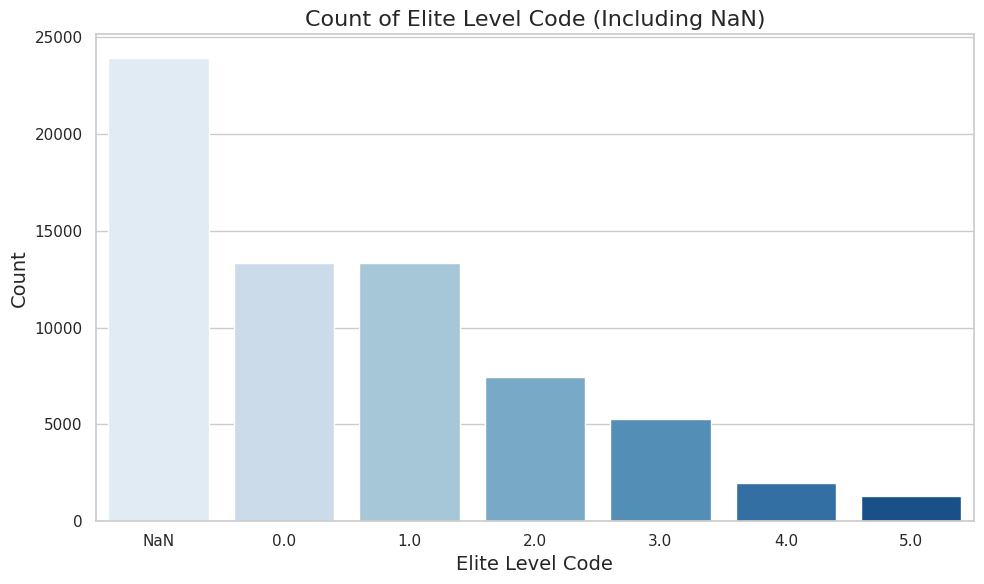

In [60]:
result_df['elite_level_category'] = result_df['elite_level_code'].fillna('NaN')
plt.figure(figsize=(10, 6))
sns.countplot(x='elite_level_category', data=result_df, order=result_df['elite_level_category'].value_counts().index, palette="Blues")

plt.xlabel('Elite Level Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Elite Level Code (Including NaN)', fontsize=16)

plt.tight_layout()
plt.show()

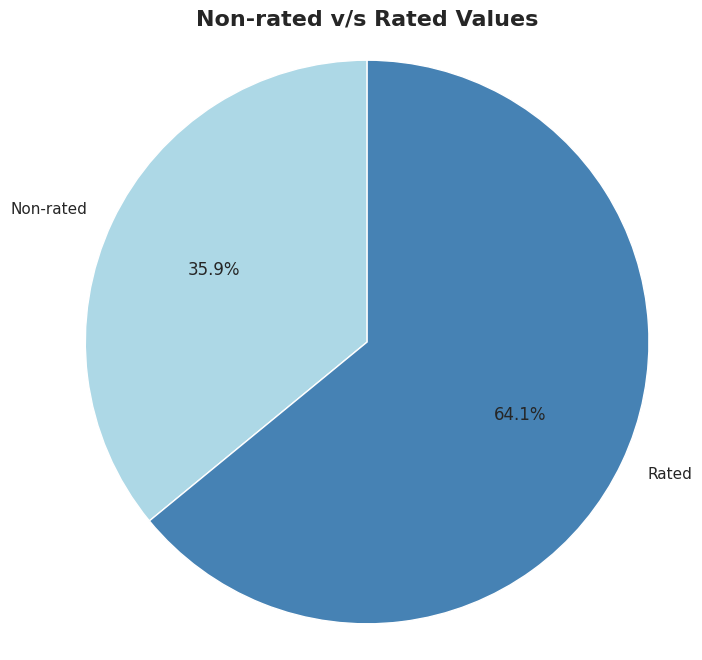

In [61]:
nan_count = result_df['elite_level_code'].isna().sum()
non_nan_count = result_df['elite_level_code'].notna().sum()

labels = ['Non-rated', 'Rated']
sizes = [nan_count, non_nan_count]
colors = ['lightblue', 'steelblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #, wedgeprops={'edgecolor': 'black'}

plt.title('Non-rated v/s Rated Values', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.show()

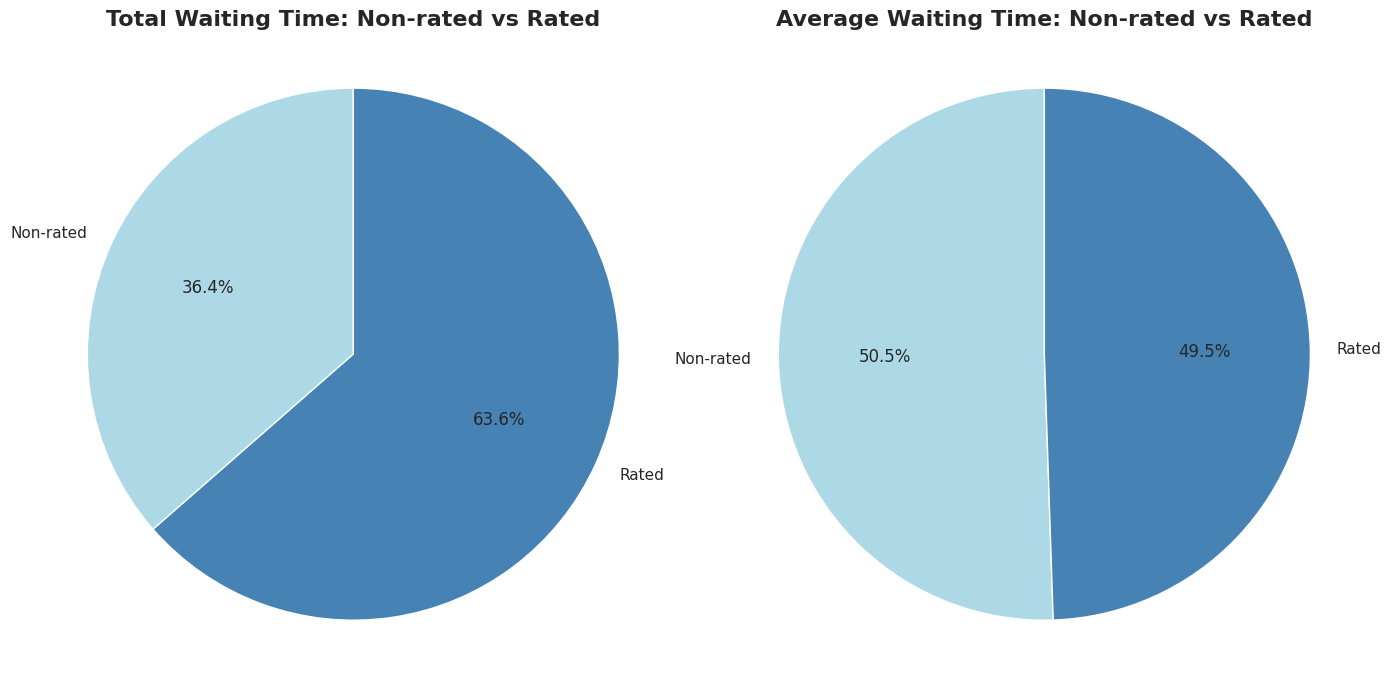

In [62]:
non_rated_total_waiting_time = result_df[result_df['elite_level_code'].isna()]['waiting_time'].sum()
rated_total_waiting_time = result_df[result_df['elite_level_code'].notna()]['waiting_time'].sum()

non_rated_avg_waiting_time = result_df[result_df['elite_level_code'].isna()]['waiting_time'].mean()
rated_avg_waiting_time = result_df[result_df['elite_level_code'].notna()]['waiting_time'].mean()

labels = ['Non-rated', 'Rated']
total_sizes = [non_rated_total_waiting_time, rated_total_waiting_time]
avg_sizes = [non_rated_avg_waiting_time, rated_avg_waiting_time]
colors = ['lightblue', 'steelblue']
plt.figure(figsize=(14, 7))

# Total Waiting Time Pie Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(total_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Total Waiting Time: Non-rated vs Rated', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Average Waiting Time Pie Chart
plt.subplot(1, 2, 2)
plt.pie(avg_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Average Waiting Time: Non-rated vs Rated', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [63]:
result_df['agent_tone'].unique()

array(['neutral', 'calm', 'frustrated', 'angry', nan, 'polite'],
      dtype=object)

In [64]:
result_df = result_df.dropna(subset=['agent_tone'])
result_df.reset_index(drop=True, inplace=True)

In [65]:
total_rows = result_df['agent_tone'].count()
Nan_values = total_rows - result_df['agent_tone'].count()

print(f"No. of unknown agent tones removed:{Nan_values}")
print( f"% of unknown agent tones: {round(Nan_values * 100 / total_rows, 3)}%.")

No. of unknown agent tones removed:0
% of unknown agent tones: 0.0%.


In [66]:
result_df['customer_tone'].unique()

array(['angry', 'neutral', 'polite', 'frustrated', 'calm'], dtype=object)

### **EDA**

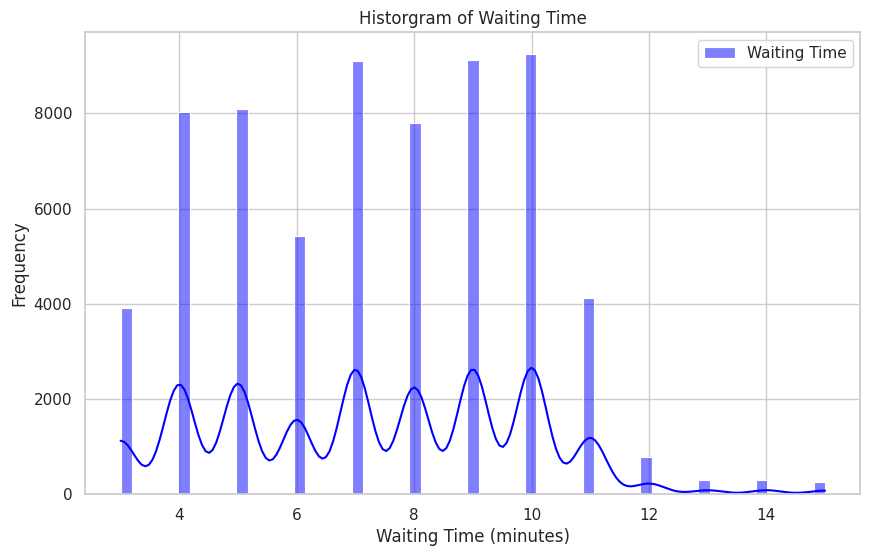

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(result_df['waiting_time'], kde=True, color='blue', label='Waiting Time')

plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.title('Historgram of Waiting Time')
plt.legend()
plt.show()

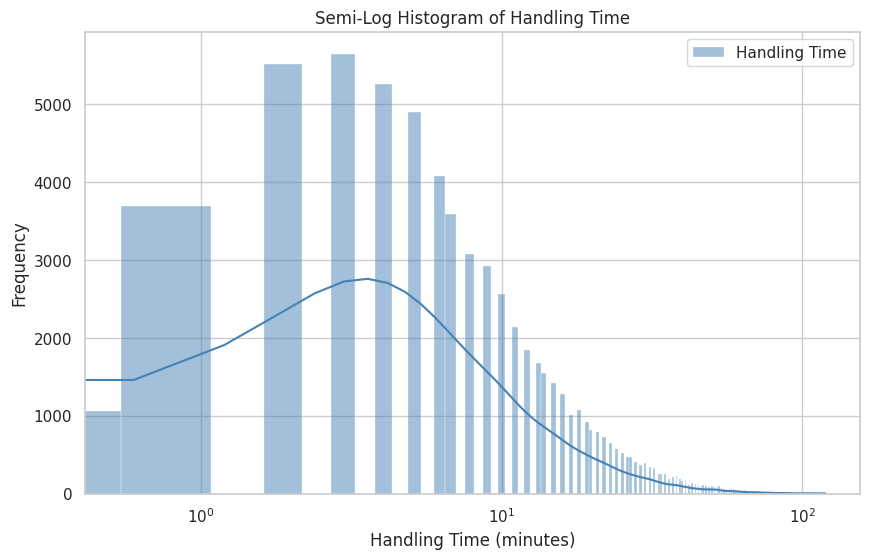

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(result_df['handling_time'], kde=True, color='steelblue', label='Handling Time')

plt.xscale('log')
plt.xlabel('Handling Time (minutes)')
plt.ylabel('Frequency')
plt.title('Semi-Log Histogram of Handling Time')
plt.legend()
plt.show()

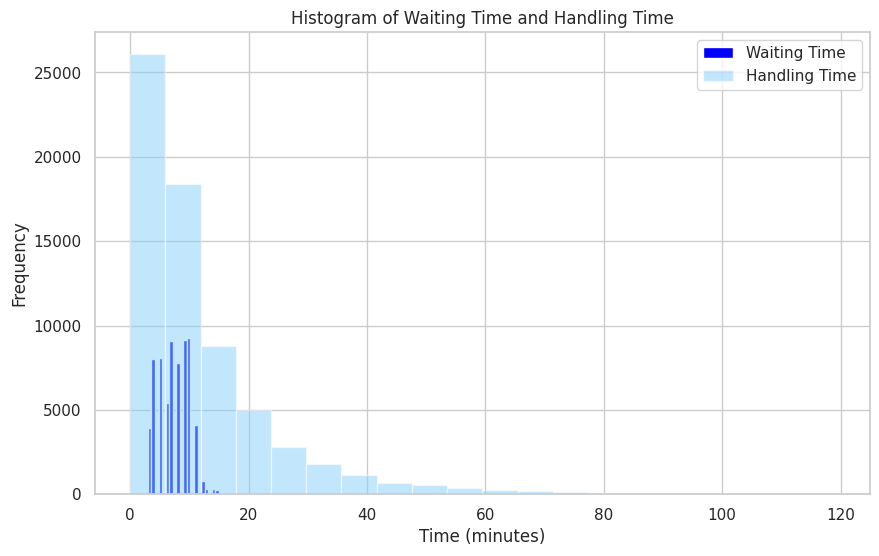

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(result_df['waiting_time'], bins=20, alpha=1, label='Waiting Time', color='blue')
plt.hist(result_df['handling_time'], bins=20, alpha=0.5, label='Handling Time', color='lightskyblue')

plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Time and Handling Time')
plt.legend()
plt.show()

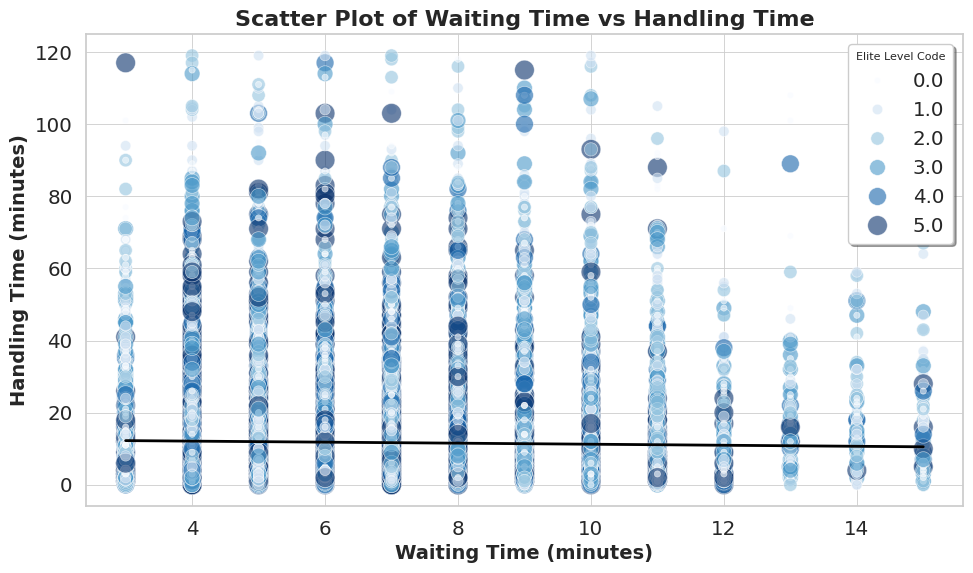

In [70]:
sns.set(style="whitegrid", font_scale=1.3, rc={"grid.linewidth": 0.6})
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x='waiting_time',
    y='handling_time',
    size='elite_level_code',
    sizes=(20, 200),
    hue='elite_level_code',
    palette='Blues',
    data=result_df,
    alpha=0.6,
    linewidth=0.5
)

sns.regplot(
    x='waiting_time',
    y='handling_time',
    data=result_df,
    scatter=False,
    color='black',
    line_kws={"linewidth": 2}
)

plt.xlabel('Waiting Time (minutes)', fontsize=14, weight='bold')
plt.ylabel('Handling Time (minutes)', fontsize=14, weight='bold')
plt.title('Scatter Plot of Waiting Time vs Handling Time', fontsize=16, weight='bold')
plt.legend(title='Elite Level Code', title_fontsize='8', loc='upper right', shadow=True)
plt.tight_layout()
plt.show()


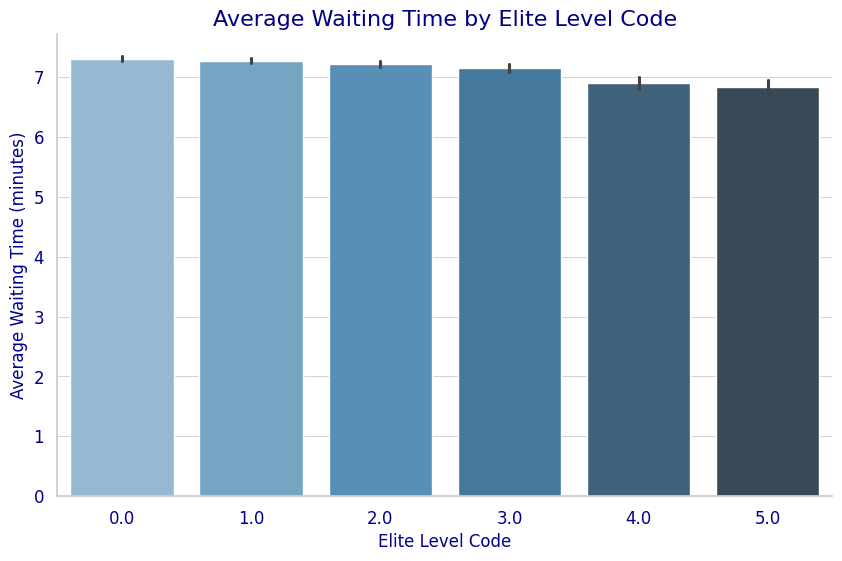

In [71]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

sns.barplot(data=result_df, x='elite_level_code', y='waiting_time',
            estimator='mean', palette='Blues_d')

plt.title('Average Waiting Time by Elite Level Code', fontsize=16, color='navy')
plt.xlabel('Elite Level Code', fontsize=12, color='darkblue')
plt.ylabel('Average Waiting Time (minutes)', fontsize=12, color='darkblue')

plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

sns.despine()

plt.show()

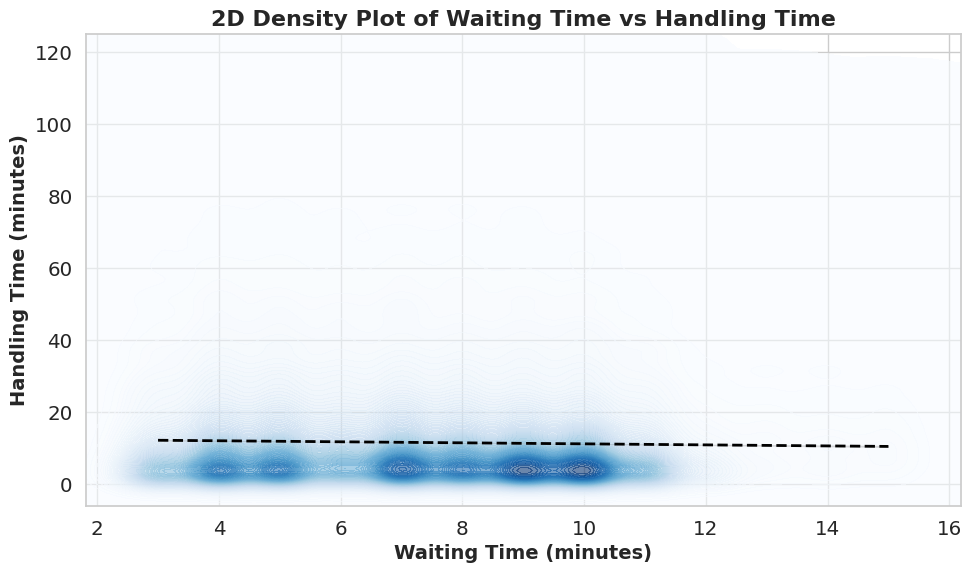

In [72]:
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(10, 6))

sns.kdeplot(
    x='waiting_time',
    y='handling_time',
    data=result_df,
    cmap='Blues',
    fill=True,
    thresh=0,
    levels=100,
    alpha=0.6
)

sns.regplot(
    x='waiting_time',
    y='handling_time',
    data=result_df,
    scatter=False,
    color='black',
    line_kws={"linewidth": 2, "linestyle": "--"}
)

plt.xlabel('Waiting Time (minutes)', fontsize=14, weight='bold')
plt.ylabel('Handling Time (minutes)', fontsize=14, weight='bold')
plt.title('2D Density Plot of Waiting Time vs Handling Time', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

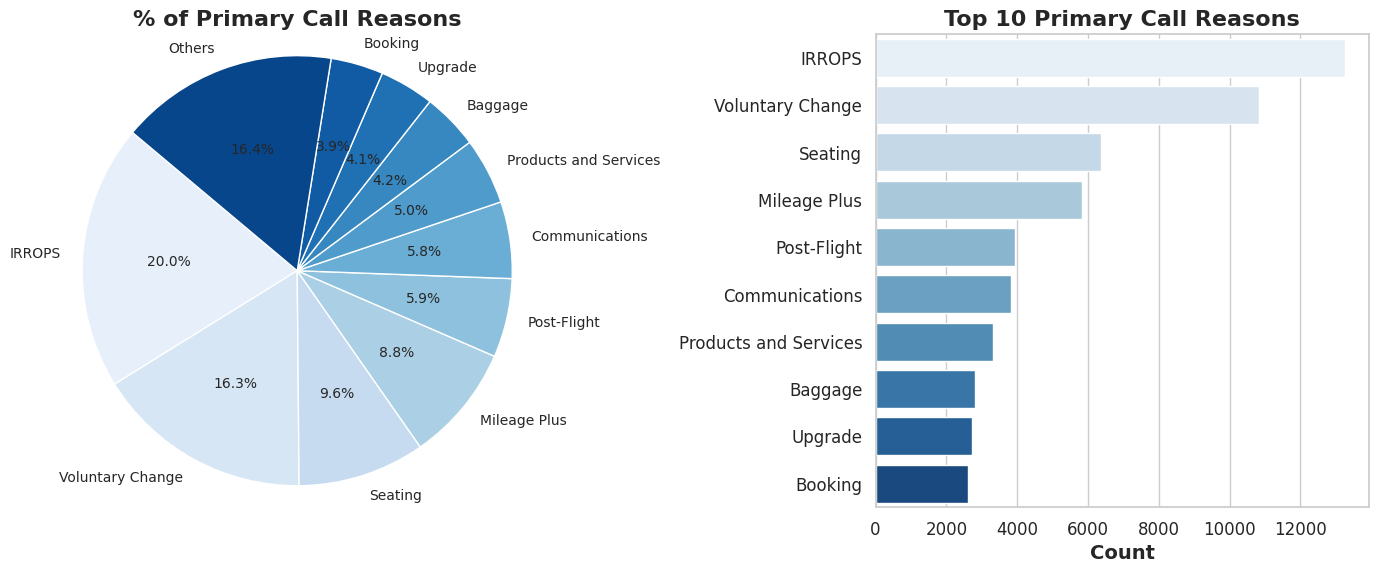

In [73]:
call_reason_counts = result_df['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']
call_reason_counts['percentage'] = (call_reason_counts['count'] / call_reason_counts['count'].sum()) * 100

others_count = call_reason_counts[call_reason_counts['percentage'] < 3.9]['count'].sum()
filtered_call_reasons = call_reason_counts[call_reason_counts['percentage'] >= 3.9]

if others_count > 0:
    others_row = pd.DataFrame({'primary_call_reason': ['Others'], 'count': [others_count]})
    filtered_call_reasons = pd.concat([filtered_call_reasons, others_row], ignore_index=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(filtered_call_reasons['count'],
        labels=filtered_call_reasons['primary_call_reason'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Blues", len(filtered_call_reasons)),
        textprops={'fontsize': 10})
plt.title('% of Primary Call Reasons', fontsize=16, weight='bold')
plt.axis('equal')

top_call_reasons = call_reason_counts.nlargest(10, 'count')

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='primary_call_reason', data=top_call_reasons, palette='Blues')
plt.title('Top 10 Primary Call Reasons', fontsize=16, weight='bold')
plt.xlabel('Count', fontsize=14, weight='bold')
plt.ylabel('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


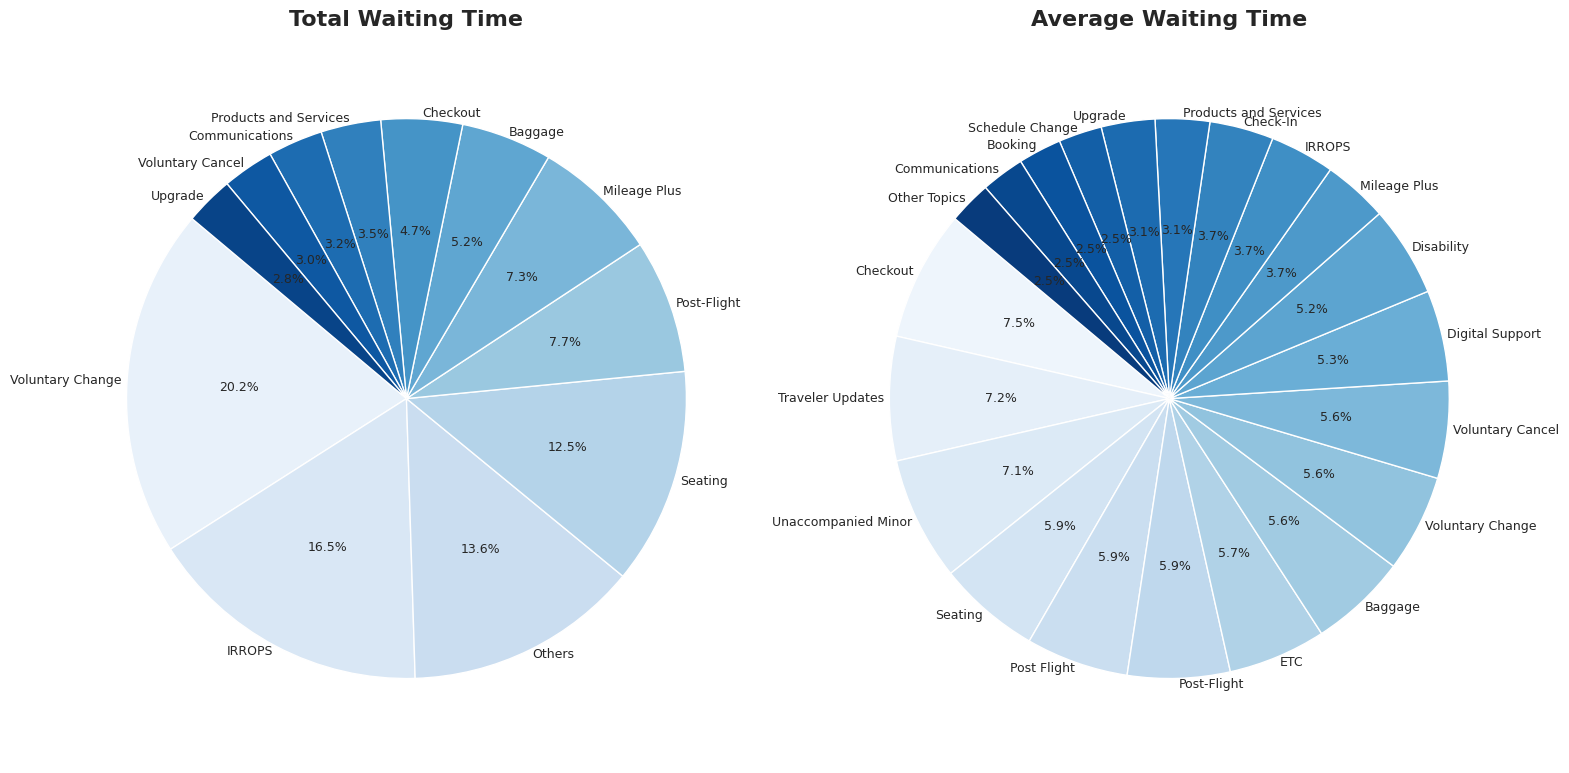

In [74]:
total_waiting_time = result_df.groupby('primary_call_reason')['waiting_time'].sum().reset_index()
total_sum = total_waiting_time['waiting_time'].sum()

total_waiting_time['percentage'] = (total_waiting_time['waiting_time'] / total_sum) * 100
total_waiting_time['primary_call_reason'] = total_waiting_time.apply(
    lambda row: 'Others' if row['percentage'] < 2.5 else row['primary_call_reason'], axis=1
)

final_waiting_time = total_waiting_time.groupby('primary_call_reason')['waiting_time'].sum().reset_index()
final_waiting_time.sort_values('waiting_time', ascending=False, inplace=True)

average_waiting_time = result_df.groupby('primary_call_reason')['waiting_time'].mean()
average_waiting_time = average_waiting_time.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
dist_from_slice = 1.02
prop_size = 9

plt.subplot(1, 2, 1)
plt.pie(
    final_waiting_time['waiting_time'],
    labels=final_waiting_time['primary_call_reason'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(final_waiting_time)),
    textprops={'fontsize': prop_size},
    labeldistance=dist_from_slice
)
plt.title('Total Waiting Time', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(
    average_waiting_time,
    labels=average_waiting_time.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(average_waiting_time)),
    textprops={'fontsize': prop_size},
    labeldistance=dist_from_slice
)
plt.title('Average Waiting Time', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

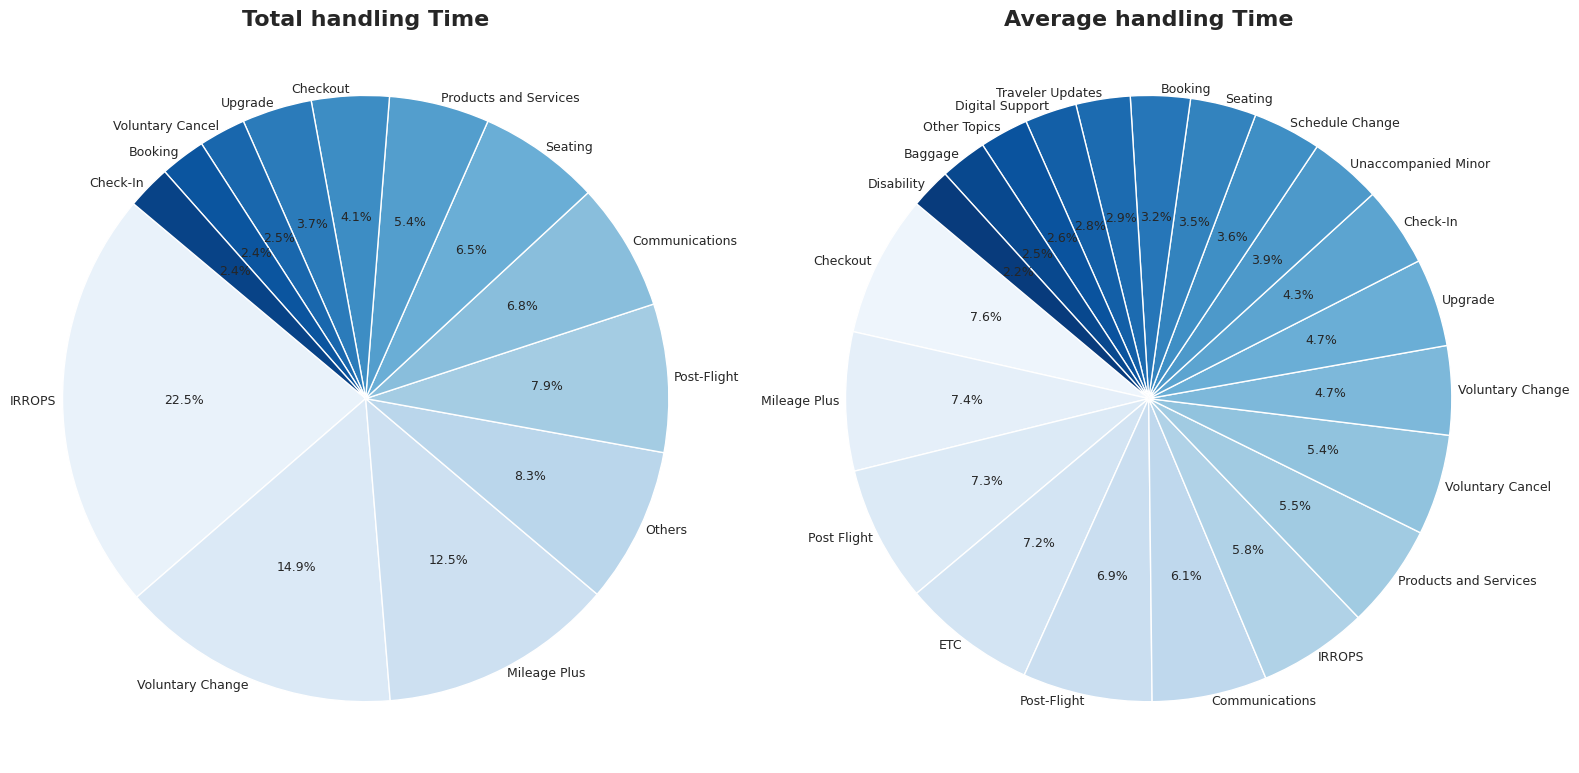

In [75]:
total_handling_time = result_df.groupby('primary_call_reason')['handling_time'].sum().reset_index()
total_sum = total_handling_time['handling_time'].sum()

total_handling_time['percentage'] = (total_handling_time['handling_time'] / total_sum) * 100
total_handling_time['primary_call_reason'] = total_handling_time.apply(
    lambda row: 'Others' if row['percentage'] < 2.2 else row['primary_call_reason'], axis=1
)

final_handling_time = total_handling_time.groupby('primary_call_reason')['handling_time'].sum().reset_index()
final_handling_time.sort_values('handling_time', ascending=False, inplace=True)

average_handling_time = result_df.groupby('primary_call_reason')['handling_time'].mean()
average_handling_time = average_handling_time.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
dist_from_slice = 1.02
prop_size = 9

plt.subplot(1, 2, 1)
plt.pie(
    final_handling_time['handling_time'],
    labels=final_handling_time['primary_call_reason'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(final_handling_time)),
    textprops={'fontsize': prop_size},
    labeldistance=dist_from_slice
)
plt.title('Total handling Time', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(
    average_handling_time,
    labels=average_handling_time.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(average_handling_time)),
    textprops={'fontsize': prop_size},
    labeldistance=dist_from_slice
)
plt.title('Average handling Time', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

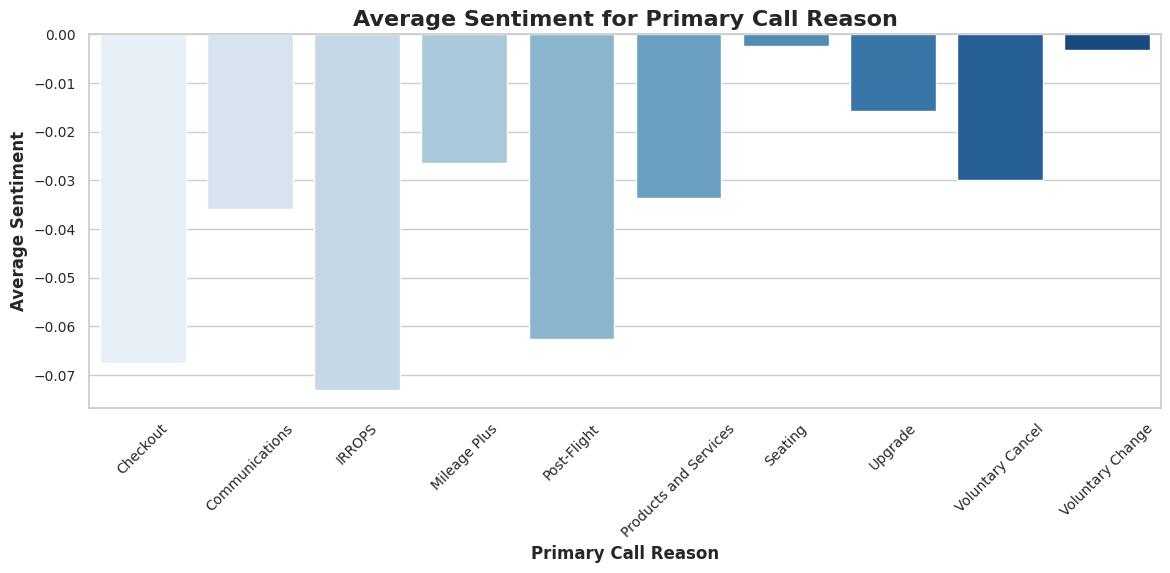

In [76]:
total_handling_time = result_df.groupby('primary_call_reason')['handling_time'].sum().reset_index()
top_call_reasons_handling_time = total_handling_time.nlargest(10, 'handling_time')['primary_call_reason']

filtered_df = result_df[result_df['primary_call_reason'].isin(top_call_reasons_handling_time)]
average_sentiment = filtered_df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()

result_df_merged = pd.merge(total_handling_time[total_handling_time['primary_call_reason'].isin(top_call_reasons_handling_time)],
                              average_sentiment, on='primary_call_reason')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='primary_call_reason',
    y='average_sentiment',
    data=result_df_merged,
    palette='Blues'
)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Sentiment for Primary Call Reason', fontsize=16, fontweight='bold')
plt.xlabel('Primary Call Reason', fontsize=12, weight = 'bold')
plt.ylabel('Average Sentiment', fontsize=12, weight = 'bold')

plt.tight_layout()
plt.show()

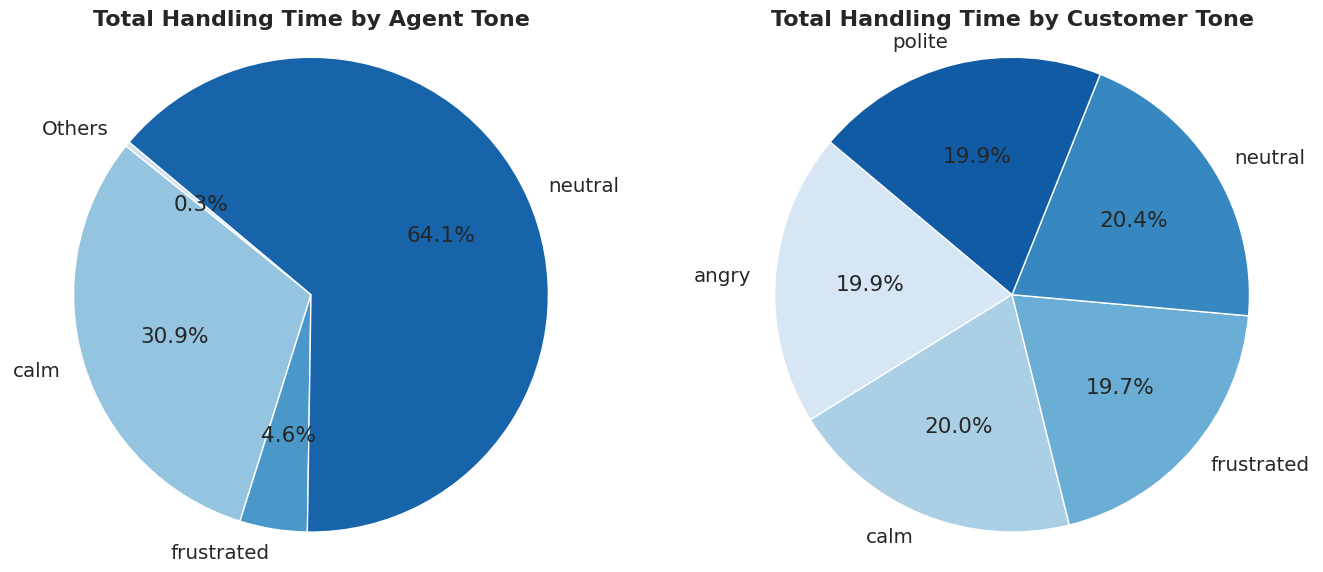

In [77]:
agent_tone_handling_time = result_df.groupby('agent_tone')['handling_time'].sum().reset_index()
agent_tone_handling_time.columns = ['agent_tone', 'total_handling_time']

customer_tone_handling_time = result_df.groupby('customer_tone')['handling_time'].sum().reset_index()
customer_tone_handling_time.columns = ['customer_tone', 'total_handling_time']

total_agent_handling_time = agent_tone_handling_time['total_handling_time'].sum()
agent_tone_handling_time['percentage'] = (agent_tone_handling_time['total_handling_time'] / total_agent_handling_time) * 100
agent_tone_handling_time['agent_tone'] = agent_tone_handling_time.apply(
    lambda row: 'Others' if row['percentage'] < 2 else row['agent_tone'], axis=1
)
final_agent_tone_handling_time = agent_tone_handling_time.groupby('agent_tone')['total_handling_time'].sum().reset_index()

total_customer_handling_time = customer_tone_handling_time['total_handling_time'].sum()
customer_tone_handling_time['percentage'] = (customer_tone_handling_time['total_handling_time'] / total_customer_handling_time) * 100
customer_tone_handling_time['customer_tone'] = customer_tone_handling_time.apply(
    lambda row: 'Others' if row['percentage'] < 2 else row['customer_tone'], axis=1
)
final_customer_tone_handling_time = customer_tone_handling_time.groupby('customer_tone')['total_handling_time'].sum().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(
    final_agent_tone_handling_time['total_handling_time'],
    labels=final_agent_tone_handling_time['agent_tone'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(final_agent_tone_handling_time))
)
plt.title('Total Handling Time by Agent Tone', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(
    final_customer_tone_handling_time['total_handling_time'],
    labels=final_customer_tone_handling_time['customer_tone'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(final_customer_tone_handling_time))
)
plt.title('Total Handling Time by Customer Tone', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()


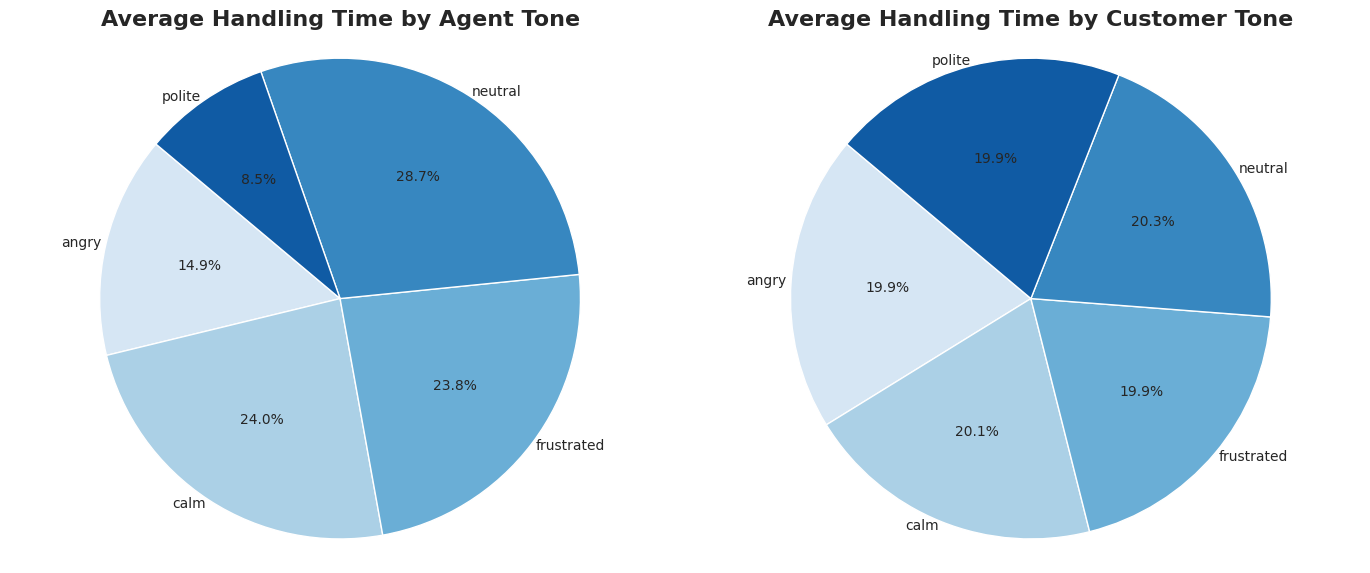

In [78]:
agent_tone_handling_time = result_df.groupby('agent_tone')['handling_time'].mean().reset_index()
agent_tone_handling_time.columns = ['agent_tone', 'average_handling_time']

customer_tone_handling_time = result_df.groupby('customer_tone')['handling_time'].mean().reset_index()
customer_tone_handling_time.columns = ['customer_tone', 'average_handling_time']

plt.figure(figsize=(14, 6))
dist_from_slice =  1.02
plt.subplot(1, 2, 1)
plt.pie(
    agent_tone_handling_time['average_handling_time'],
    labels=agent_tone_handling_time['agent_tone'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(agent_tone_handling_time)),
    textprops={'fontsize': 10},
    labeldistance=dist_from_slice
)
plt.title('Average Handling Time by Agent Tone', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(
    customer_tone_handling_time['average_handling_time'],
    labels=customer_tone_handling_time['customer_tone'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(customer_tone_handling_time)),
    textprops={'fontsize': 10},
    labeldistance=dist_from_slice
)
plt.title('Average Handling Time by Customer Tone', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

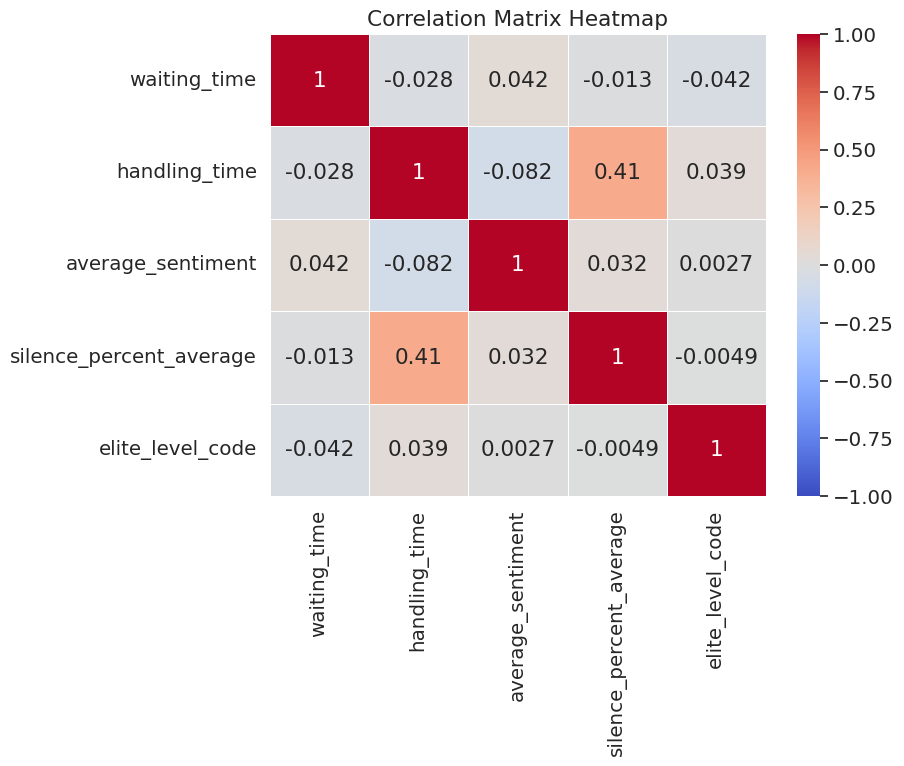

In [79]:
numerical_columns = ['waiting_time', 'handling_time', 'average_sentiment', 'silence_percent_average', 'elite_level_code']
correlation_matrix = result_df[numerical_columns].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title('Correlation Matrix Heatmap')
plt.show()

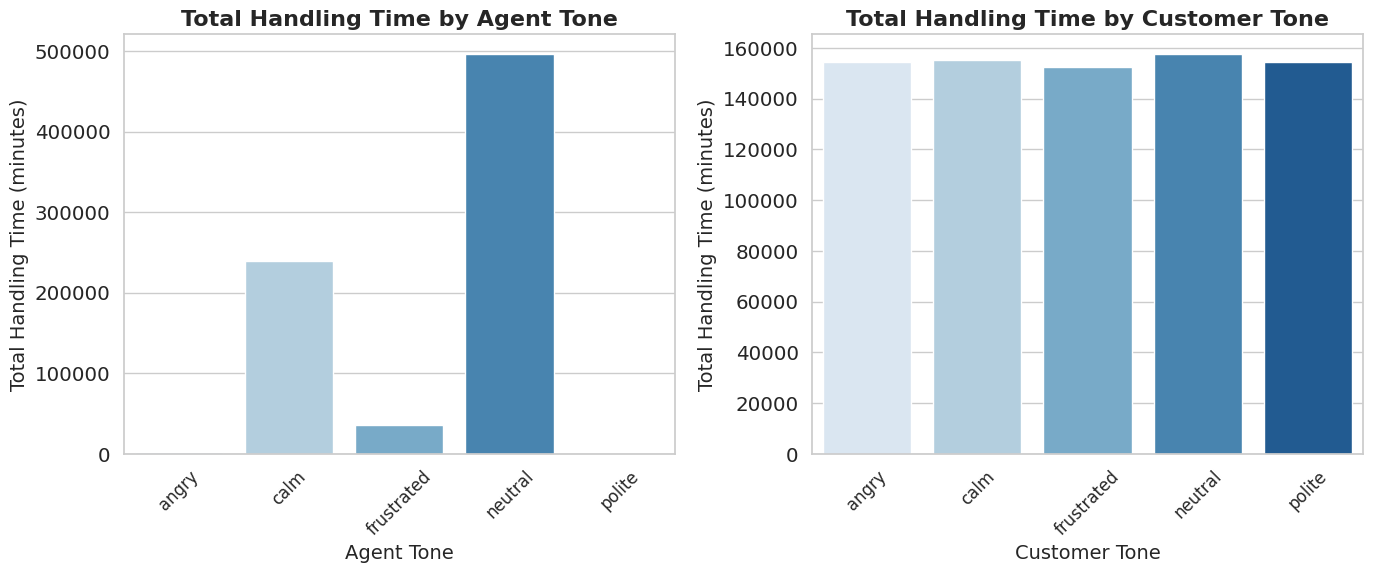

In [80]:
total_handling_time_agent = result_df.groupby('agent_tone')['handling_time'].sum().reset_index()
total_handling_time_customer = result_df.groupby('customer_tone')['handling_time'].sum().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x='agent_tone',
    y='handling_time',
    data=total_handling_time_agent,
    palette='Blues'
)
plt.title('Total Handling Time by Agent Tone', fontsize=16, fontweight='bold')
plt.xlabel('Agent Tone', fontsize=14)
plt.ylabel('Total Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(
    x='customer_tone',
    y='handling_time',
    data=total_handling_time_customer,
    palette='Blues'
)
plt.title('Total Handling Time by Customer Tone', fontsize=16, fontweight='bold')
plt.xlabel('Customer Tone', fontsize=14)
plt.ylabel('Total Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

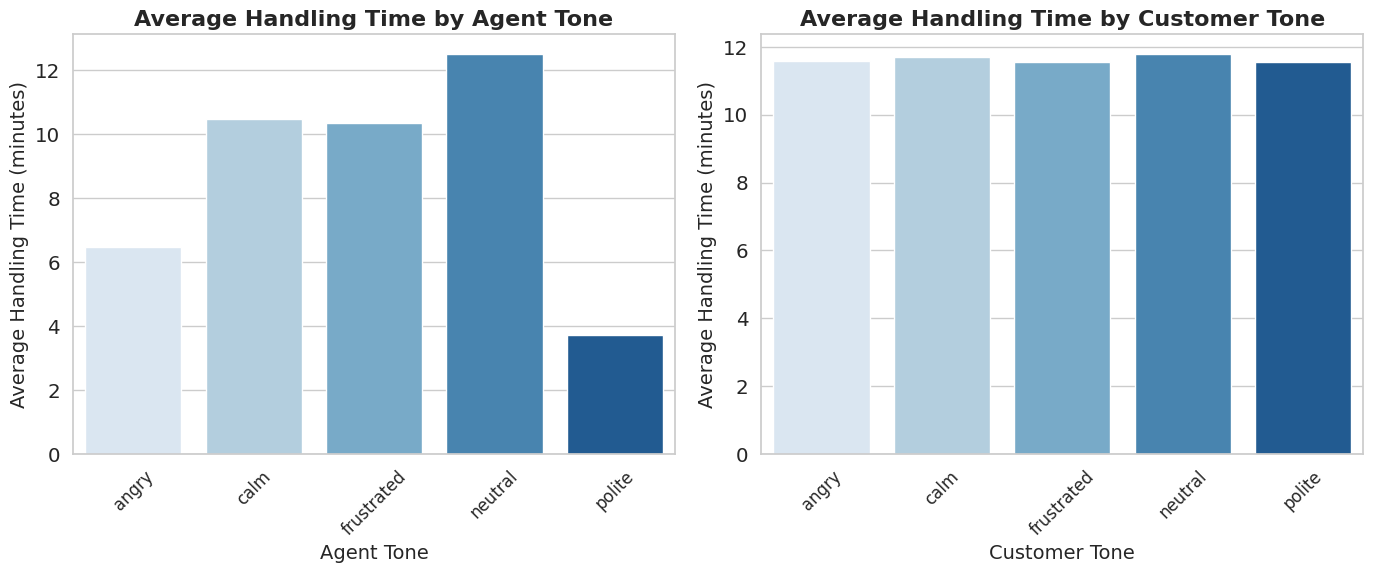

In [81]:
average_handling_time_agent = result_df.groupby('agent_tone')['handling_time'].mean().reset_index()
average_handling_time_agent.columns = ['agent_tone', 'average_handling_time']

average_handling_time_customer = result_df.groupby('customer_tone')['handling_time'].mean().reset_index()
average_handling_time_customer.columns = ['customer_tone', 'average_handling_time']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x='agent_tone',
    y='average_handling_time',
    data=average_handling_time_agent,
    palette='Blues'
)
plt.title('Average Handling Time by Agent Tone', fontsize=16, fontweight='bold')
plt.xlabel('Agent Tone', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(
    x='customer_tone',
    y='average_handling_time',
    data=average_handling_time_customer,
    palette='Blues'
)
plt.title('Average Handling Time by Customer Tone', fontsize=16, fontweight='bold')
plt.xlabel('Customer Tone', fontsize=14)
plt.ylabel('Average Handling Time (minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

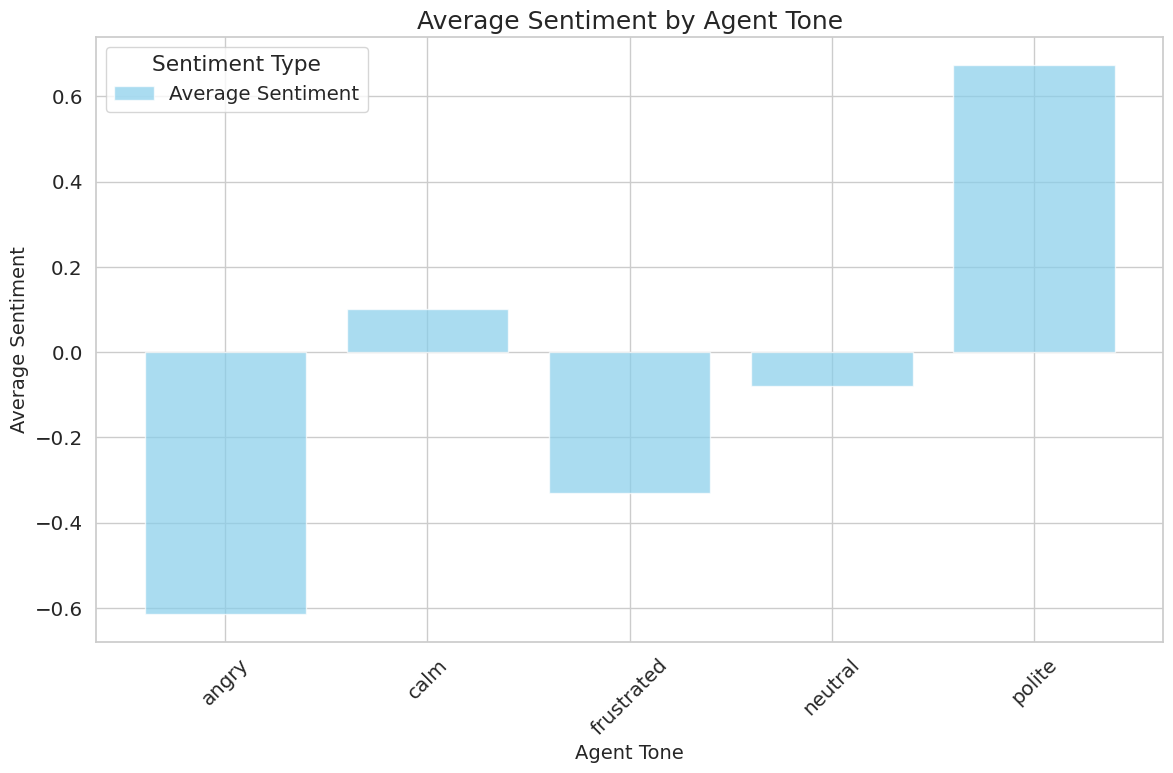

In [82]:
agent_sentiment = result_df.groupby('agent_tone')['average_sentiment'].mean().reset_index()
agent_sentiment.set_index('agent_tone', inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(agent_sentiment.index, agent_sentiment['average_sentiment'], label='Average Sentiment', color='skyblue', alpha=0.7)

plt.xlabel('Agent Tone', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.title('Average Sentiment by Agent Tone', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Type')
plt.tight_layout()
plt.show()

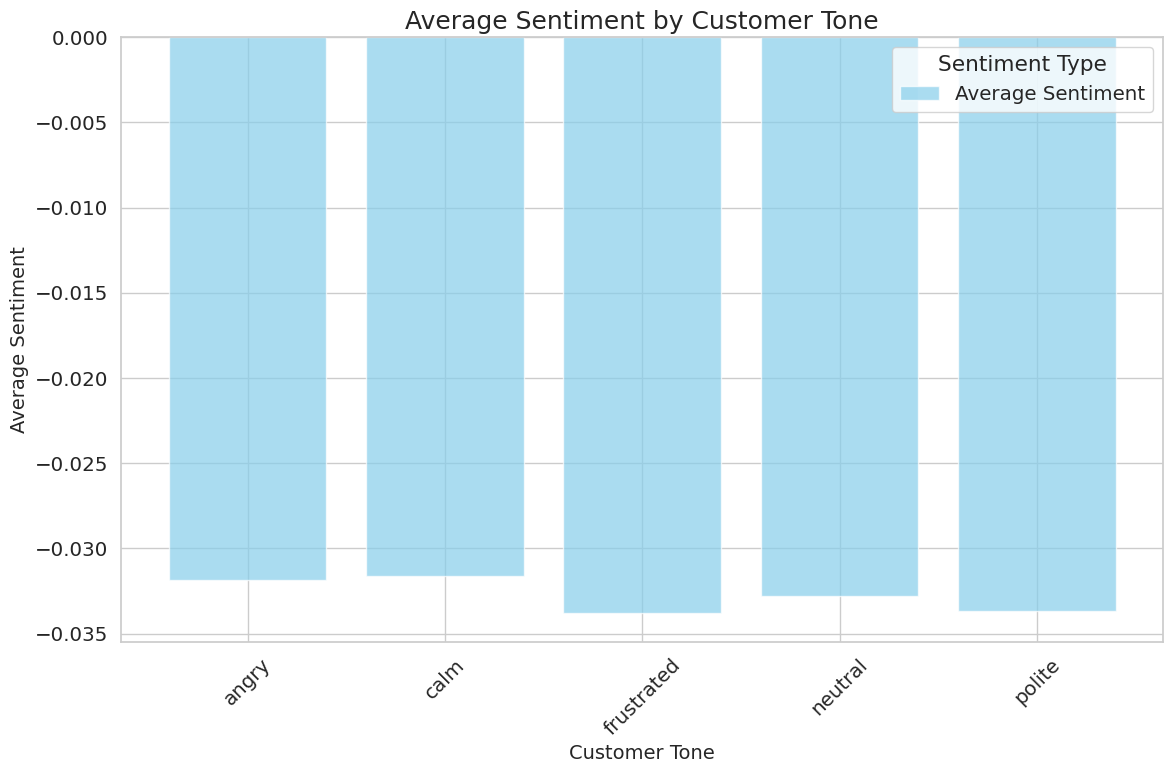

In [83]:
customer_sentiment = result_df.groupby('customer_tone')['average_sentiment'].mean().reset_index()

customer_sentiment.set_index('customer_tone', inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(customer_sentiment.index, customer_sentiment['average_sentiment'], label='Average Sentiment', color='skyblue', alpha=0.7)

plt.xlabel('Customer Tone', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.title('Average Sentiment by Customer Tone', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Type')
plt.tight_layout()
plt.show()

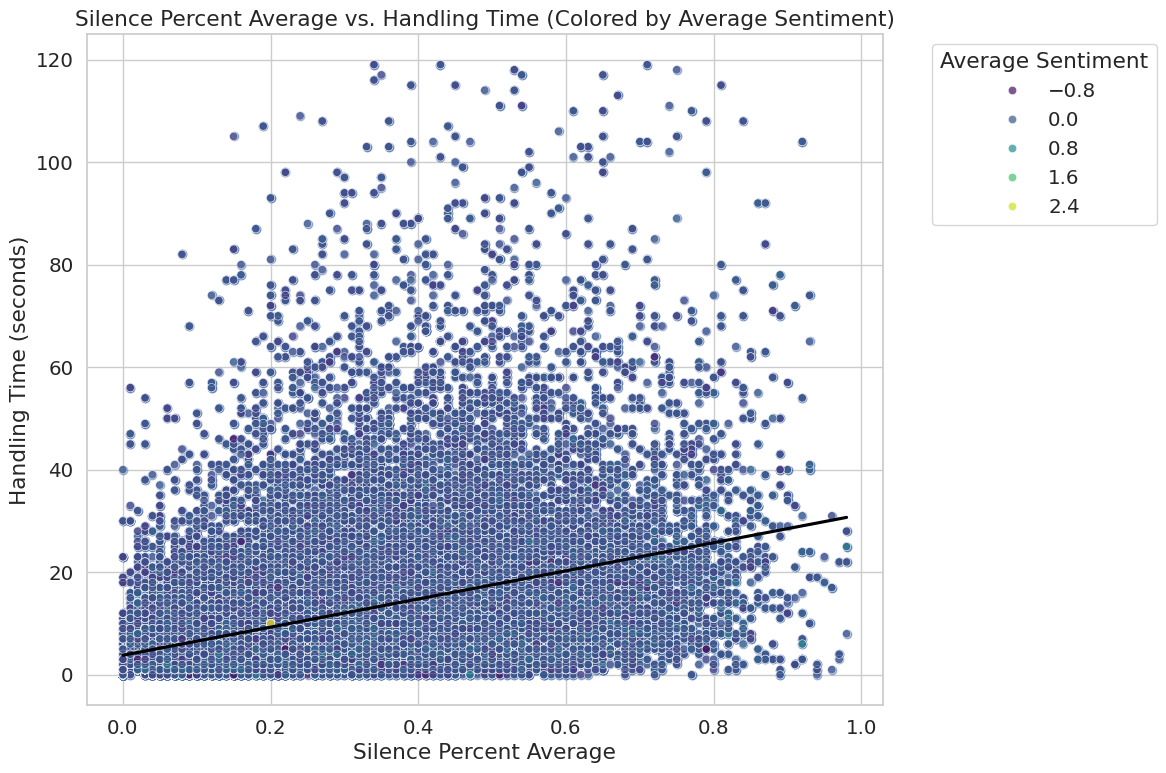

In [95]:
plt.figure(figsize=(12, 8))
sns.regplot(
    x='silence_percent_average',
    y='handling_time',
    data=result_df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'black'},
    ci=None
)

scatter = sns.scatterplot(
    x='silence_percent_average',
    y='handling_time',
    hue='average_sentiment',
    palette='viridis',
    data=result_df,
    alpha=0.7
    )

plt.title('Silence Percent Average vs. Handling Time (Colored by Average Sentiment)')
plt.xlabel('Silence Percent Average')
plt.ylabel('Handling Time (seconds)')

plt.legend(title='Average Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


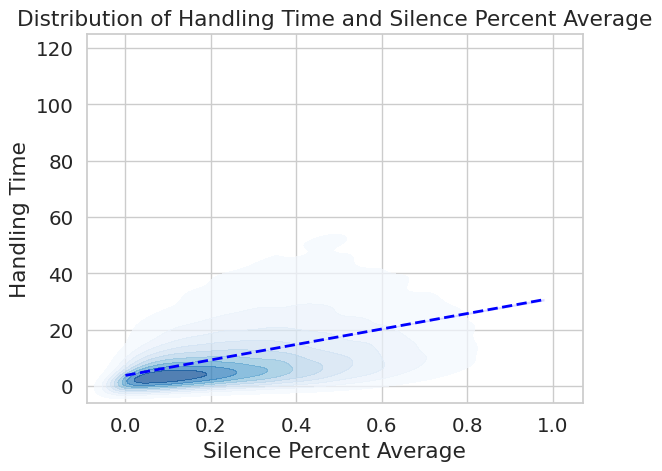

In [85]:
sns.kdeplot(x='silence_percent_average', y='handling_time', data=result_df, fill=True, cmap='Blues', alpha=0.7)

sns.regplot(x='silence_percent_average', y='handling_time', data=result_df, scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "--"})

plt.xlabel('Silence Percent Average')
plt.ylabel('Handling Time')
plt.title('Distribution of Handling Time and Silence Percent Average')
plt.show()


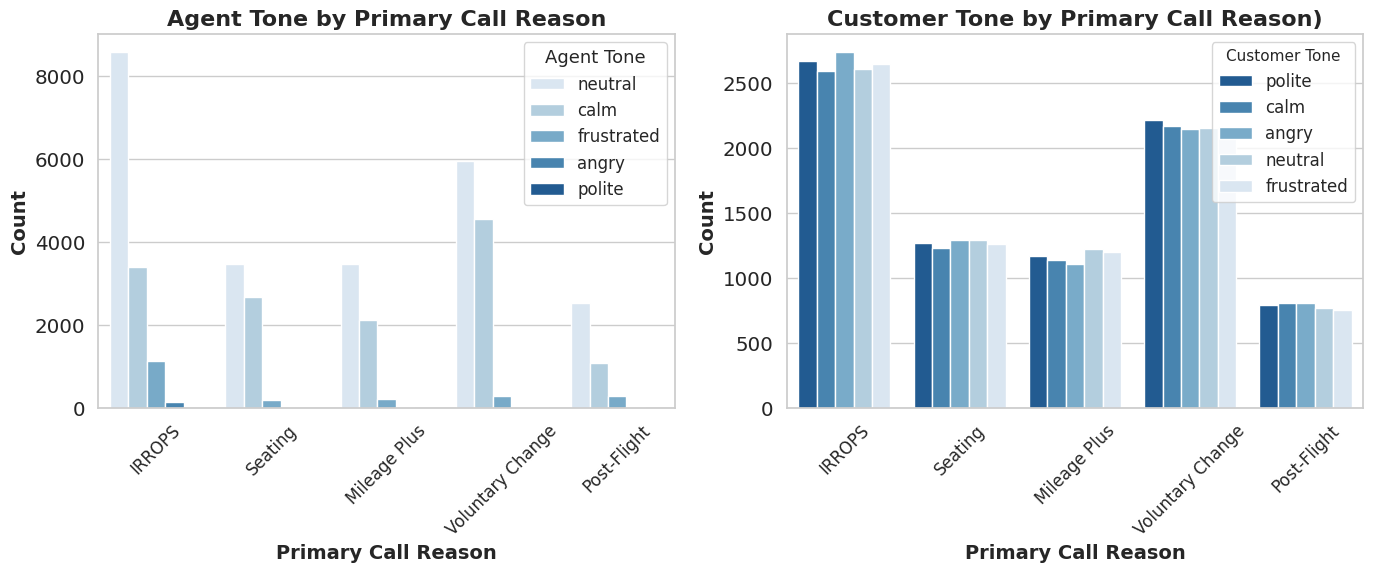

In [86]:
top_call_reasons = result_df['primary_call_reason'].value_counts().nlargest(5).index
filtered_df = result_df[result_df['primary_call_reason'].isin(top_call_reasons)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    x='primary_call_reason',
    hue='agent_tone',
    data=filtered_df,
    palette='Blues'
)
plt.xticks(rotation=45, fontsize=12)
plt.title('Agent Tone by Primary Call Reason', fontsize=16, fontweight='bold')
plt.xlabel('Primary Call Reason', fontsize=14, weight = 'bold')
plt.ylabel('Count', fontsize=14, weight = 'bold')
plt.legend(title='Agent Tone', fontsize=12, title_fontsize='13')

plt.subplot(1, 2, 2)
sns.countplot(
    x='primary_call_reason',
    hue='customer_tone',
    data=filtered_df,
    palette='Blues_r'
)
plt.xticks(rotation=45, fontsize=12)
plt.title('Customer Tone by Primary Call Reason)', fontsize=16, fontweight='bold')
plt.xlabel('Primary Call Reason', fontsize=14, weight = 'bold')
plt.ylabel('Count', fontsize=14, weight = 'bold')
plt.legend(title='Customer Tone', fontsize=12, title_fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

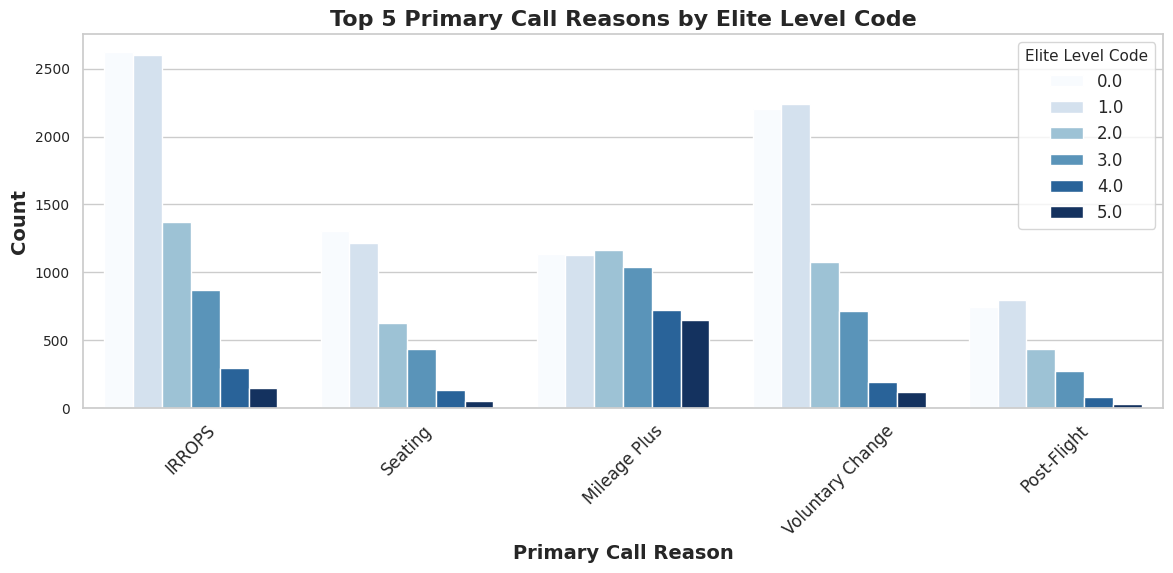

In [87]:
top_call_reasons = result_df['primary_call_reason'].value_counts().nlargest(5).index
filtered_df = result_df[result_df['primary_call_reason'].isin(top_call_reasons)]

plt.figure(figsize=(12, 6))

sns.countplot(
    x='primary_call_reason',
    hue='elite_level_code',
    data=filtered_df,
    palette='Blues'
)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)
plt.title('Top 5 Primary Call Reasons by Elite Level Code', fontsize=16, fontweight='bold')
plt.xlabel('Primary Call Reason', fontsize=14, weight = 'bold')
plt.ylabel('Count', fontsize=14, weight = 'bold')
plt.legend(title='Elite Level Code', fontsize=12, title_fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

In [88]:
reason_counts = result_df['primary_call_reason'].value_counts().reset_index()
reason_counts.columns = ['primary_call_reason', 'count']

most_frequent_reason = reason_counts.iloc[0]
least_frequent_reason = reason_counts.iloc[-1]

avg_handling_time = result_df.groupby('primary_call_reason')['handling_time'].mean().reset_index()

avg_most_frequent = avg_handling_time[avg_handling_time['primary_call_reason'] == most_frequent_reason['primary_call_reason']]['handling_time'].values[0]
avg_least_frequent = avg_handling_time[avg_handling_time['primary_call_reason'] == least_frequent_reason['primary_call_reason']]['handling_time'].values[0]

percentage_difference = ((avg_most_frequent - avg_least_frequent) / ((avg_least_frequent + avg_most_frequent)/2)) * 100

most_frequent_reason_name = most_frequent_reason['primary_call_reason']
least_frequent_reason_name = least_frequent_reason['primary_call_reason']

print(f"Most Frequent Reason: {most_frequent_reason_name} with Average Handling Time: {avg_most_frequent:.2f} minutes")
print(f"Least Frequent Reason: {least_frequent_reason_name} with Average Handling Time: {avg_least_frequent:.2f} minutes")
print(f"Percentage Difference: {percentage_difference:.2f}%")


Most Frequent Reason: IRROPS with Average Handling Time: 13.11 minutes
Least Frequent Reason: Unaccompanied Minor with Average Handling Time: 8.65 minutes
Percentage Difference: 40.95%


## **Transcript analysis**

#### libs

In [89]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure to download NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### transcript analysis

In [90]:
def preprocess_transcript(transcript):
    transcript = transcript.lower()
    tokens = word_tokenize(transcript)

    # List of words to remove
    remove_words = [
        'agent', 'customer', 'thank', 'you', 'thanks', 'let',
        'united', 'airlines', 'calling', 'please', 'help',
        "go ahead", "welcome", "appreciate", "really", "understand", "sorry", "may",
        "well", "okay", "day", "pull", "look", "good", "know", "rest",
        "taking", "ahead", "typing", "call", "disconnect", "sound",
        "sir", "yeah", "better", "go", "take", "need", "moment",
        "enjoy", "hi", "goodbye", "glad"
    ]

    tokens = [word for word in tokens if word.isalnum() and word not in remove_words]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

result_df['preprocessed_transcript'] = result_df['call_transcript'].apply(preprocess_transcript)

<ipython-input-90-a82e2f378c9a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['preprocessed_transcript'] = result_df['call_transcript'].apply(preprocess_transcript)


In [91]:
all_transcripts = ' '.join(result_df['preprocessed_transcript'])

In [92]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_transcripts)

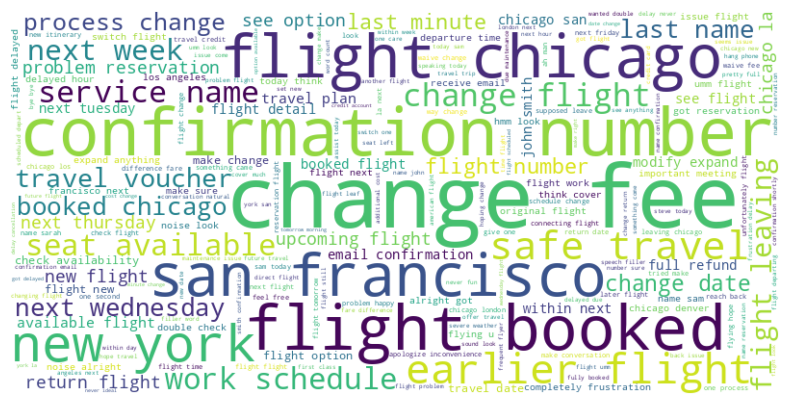

In [93]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

# # Save the plot
# plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
# plt.close()  # Close th

In [94]:
# Save the word cloud image
wordcloud_path = 'wordcloud.png'  # Change this to your desired file path
wordcloud.to_file(wordcloud_path)  # Save the word cloud as a PNG file
print(f"Word cloud saved to {wordcloud_path}")

Word cloud saved to wordcloud.png
